C:\Users\ICT01_04\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\ICT01_04\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


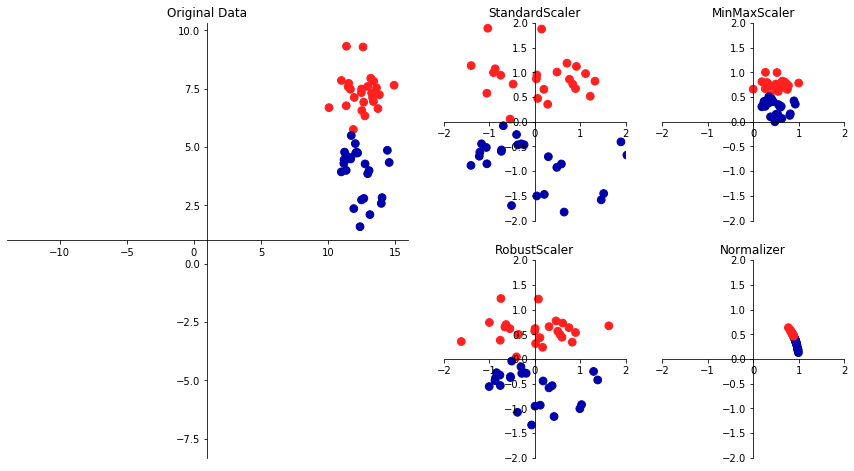

In [1]:
%matplotlib inline 
import mglearn
import matplotlib.pyplot as plt
mglearn.plots.plot_scaling()

# 표준편차를 구하는 이유 : 중심으로 부터 이격
# 분석에서는 분산 => 주성분: Z점수 = (관측치 - 평균)/표준편차
# 표준화 => 표준정규분포 (확률)

In [2]:
import pandas as pd
import numpy as np
df = pd.DataFrame([[1,     np.nan, 2],
                   [2,     3,      5],
                   [np.nan, 4,     6]])

In [3]:
df.dropna()

0    1  2
1  2.0  3.0  5

In [4]:
df.dropna(axis = 'columns')

2
0  2
1  5
2  6

In [5]:
df[3] = np.nan

In [8]:
df.dropna(axis = 'columns', how = 'all')

0    1  2
0  1.0  NaN  2
1  2.0  3.0  5
2  NaN  4.0  6

In [9]:
data = pd.Series([1, np.nan, 2, None, 3], index = list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [10]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [11]:
data.fillna(method = 'ffill') # foward fill 빈 데이터를 채울떄 이전 데이터를 다음 데이터로 채워라 

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [12]:
data.fillna(method='bfill')    # backward fill 빈 데이터를 채울때 뒤에 데이터로 앞에 데이터를 채워라 

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

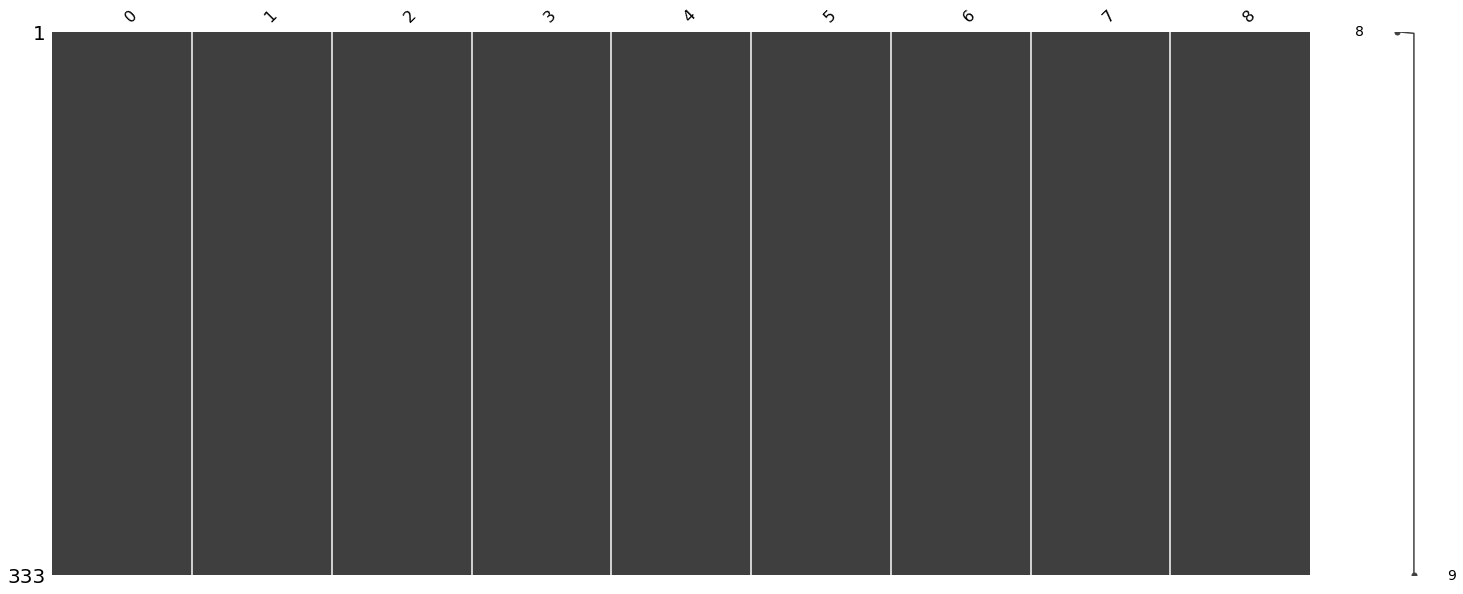

In [13]:
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('diab.csv', header = None)
msno.matrix(df)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

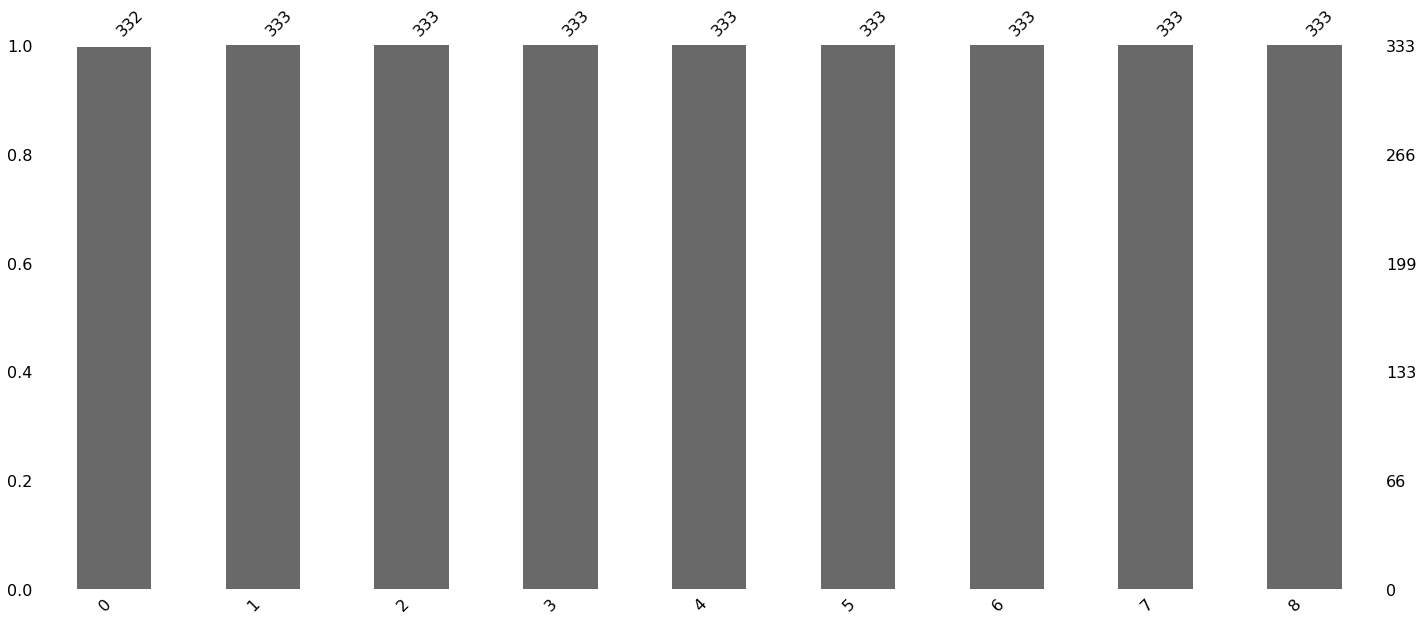

In [14]:
msno.bar(df)
plt.show

# 시각화해서 데이터의 개수가 몇개인지 파악할때 사용한다. 

In [15]:
df.dropna()

0   1    2   3   4     5      6   7    8
1      1.0   6  148  72  35  33.6  0.627  50  Yes
2      2.0   1   85  66  29  26.6  0.351  31   No
3      3.0   1   89  66  23  28.1  0.167  21   No
4      4.0   3   78  50  32    31  0.248  26  Yes
5      5.0   2  197  70  45  30.5  0.158  53  Yes
..     ...  ..  ...  ..  ..   ...    ...  ..  ...
328  328.0   2   88  58  26  28.4  0.766  22   No
329  329.0   9  170  74  31    44  0.403  43  Yes
330  330.0  10  101  76  48  32.9  0.171  63   No
331  331.0   5  121  72  23  26.2  0.245  30   No
332  332.0   1   93  70  31  30.4  0.315  23   No

[332 rows x 9 columns]

In [16]:
import numpy as np 
df = pd.DataFrame({'value':np.random.randint(0,100,20)})         #0~100중에 20개 랜덤 생성
print(df)
labels = ['{0}-{1}'.format(i,i+9) for i in range(0,100,10)]
print(labels)  # 범위값이 나온다. 
df['group'] = pd.cut(df.value, range(0,105,10), right = False, labels = labels)
# 오른쪽 끝은 제외 
print(df['group'])
raw_cat = pd.Categorical(['a','b','c','a'],
                        categories = ['b','c','d'], ordered=False)

    value
0      43
1       2
2      23
3       7
4      35
5       4
6      64
7      19
8      22
9       3
10     67
11     34
12     82
13     69
14     75
15     27
16     66
17     46
18     66
19     27
['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
0     40-49
1       0-9
2     20-29
3       0-9
4     30-39
5       0-9
6     60-69
7     10-19
8     20-29
9       0-9
10    60-69
11    30-39
12    80-89
13    60-69
14    70-79
15    20-29
16    60-69
17    40-49
18    60-69
19    20-29
Name: group, dtype: category
Categories (10, object): [0-9 < 10-19 < 20-29 < 30-39 ... 60-69 < 70-79 < 80-89 < 90-99]


In [17]:
# right = False 오른쪽 끝은 제외 , 범주화 
df['group'] = pd.cut(df.value, range(0,105,10), right = False, labels = labels)
# 문자열 라벨을 이용해 범주화 시킨다. 
print(df)

    value  group
0      43  40-49
1       2    0-9
2      23  20-29
3       7    0-9
4      35  30-39
5       4    0-9
6      64  60-69
7      19  10-19
8      22  20-29
9       3    0-9
10     67  60-69
11     34  30-39
12     82  80-89
13     69  60-69
14     75  70-79
15     27  20-29
16     66  60-69
17     46  40-49
18     66  60-69
19     27  20-29


In [18]:
raw_cat = pd.Categorical(['a','b','c','a'],
                        categories = ['b','c','d'], ordered = False)         #categorical 범주화 
raw_cat

[NaN, b, c, NaN]
Categories (3, object): [b, c, d]

In [19]:
# 원핫인코딩--> 선형회귀에서 범주형변수는 반드시 실행해야한다. 
# 연속형 + 범주형 
df = pd.DataFrame({'key': ['b','b','a','c','a','b'],
                  'data1':range(6)})
print(df)
pd.get_dummies(df['key'])

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   b      5


a  b  c
0  0  1  0
1  0  1  0
2  1  0  0
3  0  0  1
4  1  0  0
5  0  1  0

In [20]:
from pandas import Series, DataFrame
# 원래 dict 키는 중복이 안됨 
# 그러나 판다스의 DataFrame은 dict + 중복을 허용하고 순서를 보장한다. 

df1 = DataFrame({'key': ['b','b','a','c','a','a','b'],
                'data1':range(7)})

print(df1)
df2 = DataFrame({'key':['a','b','d'], 'data2':range(3)})
print(df2)
print(pd.merge(df1, df2, how = 'inner'))      # 있는것만 나온다, 
print(pd.merge(df1, df2, on = 'key'))     # 키 값 일치 
print(pd.merge(df1, df2, left_on= 'key', right_on = 'key'))
print(pd.merge(df1,df2, how = 'outer'))   # 전체다 

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   a      5
6   b      6
  key  data2
0   a      0
1   b      1
2   d      2
  key  data1  data2
0   b      0      1
1   b      1      1
2   b      6      1
3   a      2      0
4   a      4      0
5   a      5      0
  key  data1  data2
0   b      0      1
1   b      1      1
2   b      6      1
3   a      2      0
4   a      4      0
5   a      5      0
  key  data1  data2
0   b      0      1
1   b      1      1
2   b      6      1
3   a      2      0
4   a      4      0
5   a      5      0
  key  data1  data2
0   b    0.0    1.0
1   b    1.0    1.0
2   b    6.0    1.0
3   a    2.0    0.0
4   a    4.0    0.0
5   a    5.0    0.0
6   c    3.0    NaN
7   d    NaN    2.0


In [21]:
# 인덱스 이름이 왜 있는가?--> 계층적 인덱스를 생성하기 위해서 


data = DataFrame(np.arange(6).reshape(2,3), index = pd.Index(['Ohio','Colorado'], name = 'state'),
                columns = pd.Index(['one', 'two', 'three'], name = 'number'))

print(data)
result = data.stack()
print('분리')
print(result)
print(result.unstack())

number    one  two  three
state                    
Ohio        0    1      2
Colorado    3    4      5
분리
state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32
number    one  two  three
state                    
Ohio        0    1      2
Colorado    3    4      5


In [22]:
# 데이터가 중복이 벌어지면 

In [25]:
data = pd.DataFrame({'k1':['one']*3+['two']*4,
                    'k2':[1,1,2,3,3,4,4]})
print(data)
print('중복')
print(data.duplicated())
print(data.drop_duplicates())      # 원본을 제거하는 것이 아님. 
data = data.drop_duplicates()     # 에러가 난다 원본을 어떻게 바꾸어야 하는가?
data['v1'] = range(7)
print(data)

    k1  k2
0  one   1
1  one   1
2  one   2
3  two   3
4  two   3
5  two   4
6  two   4
중복
0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool
    k1  k2
0  one   1
2  one   2
3  two   3
5  two   4


ValueError: Length of values does not match length of index

In [26]:
print(data.drop_duplicates(['k1','k2']))
data.drop_duplicates(['k1','k2'], keep ='last')

    k1  k2
0  one   1
2  one   2
3  two   3
5  two   4


k1  k2
0  one   1
2  one   2
3  two   3
5  two   4

In [27]:
data = Series([1.,-999.,2., -999., -1000., 3.])

print(data)
print('---------------------------------')
print("일정데이터를 nan으로", data.replace(-999, np.nan))
print('---------------------------------')
print('변경', data.replace([-999,-1000], np.nan))
print('---------------------------------')
print('짝으로', data.replace([-999,-1000], [np.nan,0]))     #-999 = np.nan// -1000 = 0 으로 replace
print('---------------------------------')
# 키이 데이터 형식으로 지정 
print(data.replace({-999:np.nan, -1000:0}))       # -999 = np.nan/// -1000 = 0

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64
---------------------------------
일정데이터를 nan으로 0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64
---------------------------------
변경 0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64
---------------------------------
짝으로 0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64
---------------------------------
0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64


In [28]:
# 문제  
data = DataFrame(np.arange(12).reshape((3,4)), index = ['Ohio', 'Colorado', 'New York'],
                columns = ['one', 'two', 'three', 'four'])

In [29]:
data.index = data.index.map(str.upper)

In [30]:
data

one  two  three  four
OHIO        0    1      2     3
COLORADO    4    5      6     7
NEW YORK    8    9     10    11

In [31]:
# titlecase 첫자만 대문자. 
data.rename(index = str.title, columns = str.upper)  # 인덱스를 str.title --> 첫문자만 대문자로 바꾸어 준다. 


ONE  TWO  THREE  FOUR
Ohio        0    1      2     3
Colorado    4    5      6     7
New York    8    9     10    11

In [32]:
# 특정한 값만 바꾸고 싶으면

data.rename(index = {'Ohio':'Indiana'}, columns = {'three':'peekaboo'})

one  two  peekaboo  four
OHIO        0    1         2     3
COLORADO    4    5         6     7
NEW YORK    8    9        10    11

In [33]:
# 다음 데이터를 18~25 ,25~35, 35~60, 60~100 사이의 값으로 범주화 하시오 
# 범주별로 도수분포표를 작성하시오 

ages = [20,22,25,27,21,24,37,31,61,45,41,32]
bins = [18,25,35,60,100]
pd.cut(ages,bins )

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [34]:
cats = pd.cut(ages,bins)
print('범주화한 데이터 ', cats)
# 범주화 -->  숫자를 매핑한다. #숫자는 어떻게 확인하느냐?
print( 'code' , cats.codes)
print('범주의 종류는', cats.categories)
print('범주별로 카운트 한 결과 ', pd.value_counts(cats))

범주화한 데이터  [(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]
code [0 0 0 1 0 0 2 1 3 2 2 1]
범주의 종류는 IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')
범주별로 카운트 한 결과  (18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64


In [35]:
def cut(array, bins, labels, closed='right'):
    _bins = pd.IntervalIndex.from_tuples(bins, closed=closed)

    x = pd.cut(array, _bins)
    x.categories = labels
    return x

 

array = [3.5, 1, 0.5, 3]
bins = [(0,1), (1,2), (3,4)]
labels = ['first', 'second', 'third']

df = pd.DataFrame({
    'value': array,
    'category': cut(array, bins, labels, closed='right')
})
df 

value category
0    3.5    third
1    1.0    first
2    0.5    first
3    3.0      NaN

In [36]:
olive = pd.read_csv('olive.csv')

In [37]:
olive

Unnamed: 0  region  area  palmitic  palmitoleic  stearic  oleic  \
0      1.North-Apulia       1     1      1075           75      226   7823   
1      2.North-Apulia       1     1      1088           73      224   7709   
2      3.North-Apulia       1     1       911           54      246   8113   
3      4.North-Apulia       1     1       966           57      240   7952   
4      5.North-Apulia       1     1      1051           67      259   7771   
..                ...     ...   ...       ...          ...      ...    ...   
567  568.West-Liguria       3     8      1280          110      290   7490   
568  569.West-Liguria       3     8      1060          100      270   7740   
569  570.West-Liguria       3     8      1010           90      210   7720   
570  571.West-Liguria       3     8       990          120      250   7750   
571  572.West-Liguria       3     8       960           80      240   7950   

     linoleic  linolenic  arachidic  eicosenoic  
0         672         36         60          29  
1         781         31         61          29  
2         549         31         63          29  
3         619         50         78          35  
4         672         50         80          46  
..        ...        ...        ...         ...  
567       790         10         10           2  
568       810         10         10           3  
569       970          0          0           2  
570       870         10         10           2  
571       740         10         20           2  

[572 rows x 11 columns]

In [38]:
olive = pd.read_csv("./olive.csv")
print(olive.head(5))
olive.dtypes
olive.describe()

       Unnamed: 0  region  area  palmitic  palmitoleic  stearic  oleic  \
0  1.North-Apulia       1     1      1075           75      226   7823   
1  2.North-Apulia       1     1      1088           73      224   7709   
2  3.North-Apulia       1     1       911           54      246   8113   
3  4.North-Apulia       1     1       966           57      240   7952   
4  5.North-Apulia       1     1      1051           67      259   7771   

   linoleic  linolenic  arachidic  eicosenoic  
0       672         36         60          29  
1       781         31         61          29  
2       549         31         63          29  
3       619         50         78          35  
4       672         50         80          46  


region        area     palmitic  palmitoleic     stearic  \
count  572.000000  572.000000   572.000000   572.000000  572.000000   
mean     1.699301    4.599650  1231.741259   126.094406  228.865385   
std      0.859968    2.356687   168.592264    52.494365   36.744935   
min      1.000000    1.000000   610.000000    15.000000  152.000000   
25%      1.000000    3.000000  1095.000000    87.750000  205.000000   
50%      1.000000    3.000000  1201.000000   110.000000  223.000000   
75%      3.000000    7.000000  1360.000000   169.250000  249.000000   
max      3.000000    9.000000  1753.000000   280.000000  375.000000   

             oleic     linoleic   linolenic   arachidic  eicosenoic  
count   572.000000   572.000000  572.000000  572.000000  572.000000  
mean   7311.748252   980.527972   31.888112   58.097902   16.281469  
std     405.810222   242.799221   12.968697   22.030250   14.083295  
min    6300.000000   448.000000    0.000000    0.000000    1.000000  
25%    7000.000000   770.750000   26.000000   50.000000    2.000000  
50%    7302.500000  1030.000000   33.000000   61.000000   17.000000  
75%    7680.000000  1180.750000   40.250000   70.000000   28.000000  
max    8410.000000  1470.000000   74.000000  105.000000   58.000000

In [39]:
# 문제 1
# 실제 값을 변경할 때는 inplace = True
olive.rename(columns={olive.columns[0]:'ID_area'}, inplace = True)
olive.columns
olive.head(5)

ID_area  region  area  palmitic  palmitoleic  stearic  oleic  \
0  1.North-Apulia       1     1      1075           75      226   7823   
1  2.North-Apulia       1     1      1088           73      224   7709   
2  3.North-Apulia       1     1       911           54      246   8113   
3  4.North-Apulia       1     1       966           57      240   7952   
4  5.North-Apulia       1     1      1051           67      259   7771   

   linoleic  linolenic  arachidic  eicosenoic  
0       672         36         60          29  
1       781         31         61          29  
2       549         31         63          29  
3       619         50         78          35  
4       672         50         80          46

In [40]:
# 문제2) region 의 값들을 중복하지 않고 몇개의 범주인지 확인하시오 
olive.region.unique()

array([1, 2, 3], dtype=int64)

In [41]:
#문제3 처음 칼럼(ID_area)에 들어온 이상한 숫자를 제거하시오 
olive['ID_area'] = olive['ID_area'].apply(lambda x:x.split('.')[1])

In [42]:
#문제4 산성관련 성분인  'palmitic', 'palmitoleic', 'steari', 'oleic', 'linoleic',
#'arachidic', 'eicosenoic'의 컬러만 추려서 별도의 sub 데이터 프레임(변수이름 = sfsub)을 생성하시오
acidlist = ['palmitic', 'palmitoleic', 'steari', 'oleic', 'linoleic','arachidic', 'eicosenoic']
olivesub = olive[acidlist]
olivesub.head


KeyError: "['steari'] not in index"

In [43]:
#문제5 dfsub의 데이터를 모두 100으로 나누어 소수점으로 나태내시오 
olivesub = olive[acidlist].apply(lambda x :x/100.0)
olive[acidlist] = olivesub  # 원본데이터 

KeyError: "['steari'] not in index"

In [44]:
#문제6 palmitic 산과 liolenic 산의 분포도를 시각화하시오
fig = plt.figure()
plt.scatter(olive['palmitic'], olive['linolenic'])
axis = fig.gca()
axis.set_title('linolenic vs palmitic')
axis.set_xlabel('palmitic')
axis.set_ylabel('linolenic')

Text(0, 0.5, 'linolenic')

In [45]:
#문제7 groupby를 활용하여 region 을 기준으로 묶어서 region_groupby 객체로 생성
region_groupby = olive.groupby(['region'])  #groupby 객체
region_groupby.apply(np.mean) # 여러개를 할때는 aggFunc
region_groupby.apply(lambda x : x.mean())
region_groupby.describe()    

area                                              palmitic  \
        count      mean       std  min  25%  50%  75%  max    count   
region                                                                
1       323.0  2.783282  0.741054  1.0  2.5  3.0  3.0  4.0    323.0   
2        98.0  5.336735  0.475023  5.0  5.0  5.0  6.0  6.0     98.0   
3       151.0  8.006623  0.820542  7.0  7.0  8.0  9.0  9.0    151.0   

                     ... arachidic        eicosenoic                       \
               mean  ...       75%    max      count       mean       std   
region               ...                                                    
1       1332.287926  ...      69.0  102.0      323.0  27.321981  8.391528   
2       1111.346939  ...      81.0  105.0       98.0   1.938776  0.743582   
3       1094.801325  ...      59.5  100.0      151.0   1.973510  0.729813   

                                      
         min   25%   50%   75%   max  
region                                
1       10.0  22.0  27.0  32.0  58.0  
2        1.0   1.0   2.0   2.0   3.0  
3        1.0   1.0   2.0   2.5   3.0  

[3 rows x 72 columns]

In [46]:
#문제8 region_gruopby에 describe()메소드 적용하여 출력해보시오 
